In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy

In [2]:
data1=pd.read_csv("business_data_cut.csv")
data2=pd.read_csv("states.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 15 columns):
Unnamed: 0      19260 non-null int64
address         18501 non-null object
attributes      16395 non-null object
business_id     19260 non-null object
categories      19212 non-null object
city            19260 non-null object
hours           14694 non-null object
is_open         19260 non-null int64
latitude        19260 non-null float64
longitude       19260 non-null float64
name            19260 non-null object
postal_code     19188 non-null object
review_count    19260 non-null int64
stars           19260 non-null float64
state           19260 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 2.2+ MB


In [3]:
data1.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [4]:
data1=data1[data1.is_open!=0]

In [5]:
data1

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': ""{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,NaN,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
9,9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH
10,10,"1210 8th Street SW, Unit 220","{'BikeParking': 'False', 'ByAppointmentOnly': ...",fcXOEZdXYeZqnQ3lGlOXmg,"Local Services, Professional Services, Compute...",Calgary,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,51.041771,-114.081109,Nucleus Information Service,T2R 1L3,5,2.0,AB
11,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ


In [6]:
data1.drop(["Unnamed: 0"],axis=1,inplace=True)
data1

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': ""{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,NaN,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH
10,"1210 8th Street SW, Unit 220","{'BikeParking': 'False', 'ByAppointmentOnly': ...",fcXOEZdXYeZqnQ3lGlOXmg,"Local Services, Professional Services, Compute...",Calgary,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,51.041771,-114.081109,Nucleus Information Service,T2R 1L3,5,2.0,AB
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ


In [7]:
res = data1[data1['categories'].str.contains('Restaurants', regex=False, case=False, na=False)]

In [8]:
res

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
23,"Center Core - Food Court, Fl 3, Pittsburgh Int...","{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,NaN,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA
25,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': ""{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
29,1170 Queen Street W,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...",NDuUMJfrWk52RA-H-OtrpA,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,"{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON
61,"17205 Leslie Street, Unit 2","{'RestaurantsAttire': ""'casual'"", 'Restaurants...",6l00a9Gkxkcp_y-GPjYBiw,"Fish & Chips, Restaurants",Newmarket,NaN,1,44.058765,-79.429115,J's Fish & Chips,L3Y 8Y8,12,4.5,ON
66,4606 Penn Ave,"{'CoatCheck': 'False', 'BusinessParking': ""{'g...",dQj5DLZjeDK3KFysh1SYOQ,"Nightlife, Bars, Polish, Modern European, Rest...",Pittsburgh,"{'Wednesday': '17:0-0:0', 'Thursday': '17:0-0:...",1,40.465694,-79.949324,Apteka,15224,242,4.5,PA
71,3085 Hurontario Street,"{'Ambience': ""{'romantic': False, 'intimate': ...",9UTpmQ4OhX5jNFUIu7dPPQ,"Restaurants, Korean",Mississauga,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.582262,-79.618858,Buk Chang Dong Soon Tofu,L5A,103,4.0,ON


In [9]:
# "You are working at _**\"Board out of your mind\"**_, the travellers' magazine from a large flight carrier. They need an article about the top ten cities for dining in North America and you decided that this is going to be **your** project for this week. You decided to try your newly acquired skills paired with a well maintained _yelp_ dataset. Here's what you decided to do:\n",
#     "\n",
#     "1. Gather the information from this [link](https://www.yelp.com/dataset) and create a dataframe; _**!!(Let's skip this because it is too resource intensive)!!**_\n",
#     "2. Explore the data and learn more about the dataset;\n",
#     "3. clean the dataset so it only has relevant data;\n",
#     "4. Which cities provide the most restaurants;\n",
#     "5. Which cities have the best restaurants;\n",
#     "6. What are the restaurant categories available;\n",
#     "7.  Create three personas that you believe would relate to the audience of the magazine;\n",
#     "8. Pick a city for each of them;\n",
#     "9. Provide extra information regarding those three cities;\n",
#     "10. Provide a rich set of infographics.\n",
#     "\n",
#     "Here are the libraries I suggest you to use:\n",
#     "\n",
#     "- Pandas;\n",
#     "- Geopandas\n",
#     "- Matplotlib (check Basemap);\n",
#     "- Seaborn;\n",
#     "- StatsModels;\n"
#    ]
#   },

In [10]:
data1['state'].unique()

array(['ON', 'NC', 'AZ', 'AB', 'NV', 'OH', 'PA', 'QC', 'WI', 'IL', 'NY',
       'SC', 'TX', 'UT', 'NM', 'FL'], dtype=object)

In [11]:
data2['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [12]:
data2["Abbreviation"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MT', 'NE',
       'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [13]:
data1['state'].nunique()

16

In [14]:
unique_states=list(data1['state'].unique())

In [15]:
all_states=list(data2["Abbreviation"])

In [16]:
not_usa=[]
for data2 in unique_states:
    if data2 not in all_states:
        not_usa.append(data2)

In [17]:
not_usa

['ON', 'AB', 'QC']

In [18]:
data1[data1["state"].isin(all_states)]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
12,"119 Landings Dr, Ste 101","{'BusinessParking': ""{'garage': False, 'street...",5t3KVdMnFgAYmSl1wYLhmA,"Bars, Nightlife, Pubs, Barbers, Beauty & Spas,...",Mooresville,"{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ...",1,35.527410,-80.868003,The Kilted Buffalo Langtree,28117,9,3.5,NC
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
14,4145 Erie St,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",-K4gAv8_vjx8-2BxkVeRkA,"Bakeries, Food",Willoughby,"{'Tuesday': '11:0-17:0', 'Wednesday': '11:0-17...",1,41.639860,-81.406396,Baby Cakes,44094,7,3.0,OH
16,"4848 E Cactus Rd, Ste 100","{'BusinessAcceptsCreditCards': 'True', 'Busine...",giC3pVVFxCRR89rApqklyw,"Hair Stylists, Beauty & Spas, Hair Salons, Men...",Scottsdale,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1,33.600071,-111.977371,Knot Salon,85254,5,5.0,AZ


In [19]:
us_business=data1[data1["state"].isin(all_states)]

In [20]:
us_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11783 entries, 2 to 19259
Data columns (total 14 columns):
address         11149 non-null object
attributes      9924 non-null object
business_id     11783 non-null object
categories      11745 non-null object
city            11783 non-null object
hours           9531 non-null object
is_open         11783 non-null int64
latitude        11783 non-null float64
longitude       11783 non-null float64
name            11783 non-null object
postal_code     11744 non-null object
review_count    11783 non-null int64
stars           11783 non-null float64
state           11783 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 1.3+ MB


In [21]:
res = us_business[us_business['categories'].str.contains('Restaurants',regex=False, case=False, na=False)]

In [22]:
res

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
23,"Center Core - Food Court, Fl 3, Pittsburgh Int...","{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,NaN,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA
25,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': ""{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
66,4606 Penn Ave,"{'CoatCheck': 'False', 'BusinessParking': ""{'g...",dQj5DLZjeDK3KFysh1SYOQ,"Nightlife, Bars, Polish, Modern European, Rest...",Pittsburgh,"{'Wednesday': '17:0-0:0', 'Thursday': '17:0-0:...",1,40.465694,-79.949324,Apteka,15224,242,4.5,PA
73,436 Market St,"{'OutdoorSeating': 'False', 'HasTV': 'True', '...",v-scZMU6jhnmV955RSzGJw,"Japanese, Sushi Bars, Restaurants",Pittsburgh,"{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",1,40.441062,-80.002126,No. 1 Sushi Sushi,15222,106,4.5,PA
77,825 Commonwealth Ave,"{'GoodForMeal': ""{'dessert': False, 'latenight...",KFbUQ-RR2UOV62Ep7WnXHw,"American (Traditional), Restaurants",West Mifflin,"{'Wednesday': '11:0-0:0', 'Thursday': '11:0-0:...",1,40.376674,-79.882480,Westwood Bar & Grill,15122,5,3.0,PA
78,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,33.613020,-111.977036,Nee House Chinese Restaurant,85032,269,3.5,AZ
111,4343 N Rancho Dr,NaN,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",Las Vegas,NaN,1,36.238596,-115.233331,Imperial Asian Buffet,89030,4,2.0,NV


In [23]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2451 entries, 2 to 19256
Data columns (total 14 columns):
address         2422 non-null object
attributes      2360 non-null object
business_id     2451 non-null object
categories      2451 non-null object
city            2451 non-null object
hours           2060 non-null object
is_open         2451 non-null int64
latitude        2451 non-null float64
longitude       2451 non-null float64
name            2451 non-null object
postal_code     2448 non-null object
review_count    2451 non-null int64
stars           2451 non-null float64
state           2451 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 287.2+ KB


In [24]:
# res.dropna(subset=['address'])

In [25]:

res['stars'].unique()

array([4. , 3. , 4.5, 3.5, 2. , 2.5, 5. , 1.5, 1. ])

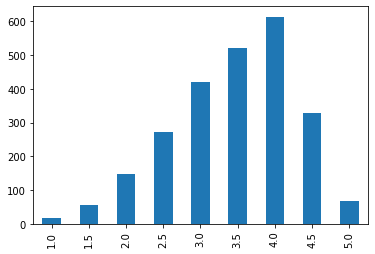

In [26]:
res["stars"].value_counts().sort_index().plot(kind="bar")

In [27]:
res['review_count'][res["stars"]==1.0].mean()

7.277777777777778

In [28]:
unique_stars=sorted(res['stars'].unique())

In [29]:
unique_stars

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [30]:
avg_review_count=[]
for star in unique_stars:
    avg=res['review_count'][res['stars']==star].mean()
    avg_review_count.append(avg)

In [31]:
avg_review_count

[7.277777777777778,
 18.596491228070175,
 24.844594594594593,
 48.61904761904762,
 66.21140142517815,
 123.99233716475096,
 177.94788273615634,
 156.69604863221883,
 48.710144927536234]

<BarContainer object of 9 artists>

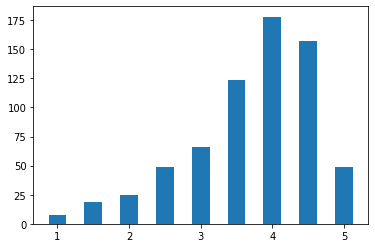

In [32]:
 plt.bar(x=unique_stars,height=avg_review_count,width=0.25)

In [33]:
res['attributes'].fillna('{}',inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
attributes_dict=[{'attributes':ast.literal_eval(x)} for x in res['attributes'].values]

In [35]:
attributes_dict

[{'attributes': {'GoodForKids': 'True',
   'NoiseLevel': "u'average'",
   'RestaurantsDelivery': 'False',
   'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
   'Alcohol': "u'beer_and_wine'",
   'Caters': 'False',
   'WiFi': "u'no'",
   'RestaurantsTakeOut': 'True',
   'BusinessAcceptsCreditCards': 'True',
   'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}",
   'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
   'RestaurantsTableService': 'True',
   'RestaurantsGoodForGroups': 'True',
   'OutdoorSeating': 'False',
   'HasTV': 'True',
   'BikeParking': 'True',
   'RestaurantsReservations': 'True',
   'RestaurantsPriceRange2': '2',
   'RestaurantsAttire': "'casual'"}},
 {'attributes': {'RestaurantsTakeOut': 'True',
   'BusinessParking

In [36]:
attributes_df=pd.io.json.json_normalize(attributes_dict)

In [37]:
attributes_df.head()

,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,...,attributes.RestaurantsAttire,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi
0,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",...,'casual',False,True,2,True,True,True,NaN,NaN,u'no'
1,NaN,u'none',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",...,u'casual',False,True,1,False,NaN,True,NaN,NaN,u'no'
2,NaN,u'none',None,NaN,NaN,NaN,True,NaN,True,None,...,u'casual',True,True,2,False,NaN,True,NaN,NaN,NaN
3,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",...,NaN,False,True,1,False,NaN,True,NaN,NaN,NaN
4,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",...,u'casual',False,True,1,False,NaN,True,NaN,NaN,u'no'


In [38]:
dummy_categories=res['categories'].str.get_dummies(sep=",")

In [39]:
dummy_categories.head()

,Acai Bowls,Accessories,Active Life,Adult Education,Adult Entertainment,African,Airport Shuttles,Amateur Sports Teams,American (New),American (Traditional),...,Thai,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waxing,Wine Bars,Wine Tasting Classes,Wineries,Wraps
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
categories_sum=dummy_categories.sum(axis=0)

In [41]:
res['hours'].fillna('{}',inplace=True)

In [42]:
hours_dict=[{'hours':ast.literal_eval(x)} for x in res['hours'].values]

In [46]:
hours_df=pd.io.json.json_normalize(hours_dict)

In [47]:
hours_df.head()

,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday
0,17:30-22:0,17:30-21:30,17:30-22:0,17:30-21:0,17:30-21:30,NaN,17:30-21:30
1,7:0-1:0,7:0-0:0,7:0-1:0,7:0-0:0,7:0-1:0,7:0-0:0,7:0-0:0
2,10:0-1:0,10:0-0:0,10:0-1:0,10:0-0:0,10:0-0:0,10:0-0:0,10:0-0:0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10:0-21:0,11:0-21:0,10:0-21:0,10:0-20:0,10:0-21:0,10:0-21:0,10:0-21:0
